# Project - 2 
# classification of Patient's Condition using patients review

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
import string

In [2]:
data=pd.read_csv('drugsCom_raw (1).tsv', sep="\t",encoding='latin-1')

In [3]:
data

Unnamed: 0                  drugName                     condition  \
0           206461                 Valsartan  Left Ventricular Dysfunction   
1            95260                Guanfacine                          ADHD   
2            92703                    Lybrel                 Birth Control   
3           138000                Ortho Evra                 Birth Control   
4            35696  Buprenorphine / naloxone             Opiate Dependence   
...            ...                       ...                           ...   
161292      191035                   Campral            Alcohol Dependence   
161293      127085            Metoclopramide               Nausea/Vomiting   
161294      187382                   Orencia          Rheumatoid Arthritis   
161295       47128        Thyroid desiccated           Underactive Thyroid   
161296      215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   
2       "I used to take another oral contraceptive, wh...     5.0   
3       "This is my first time using any form of birth...     8.0   
4       "Suboxone has completely turned my life around...     9.0   
...                                                   ...     ...   
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
0             May 20, 2012           27  
1           April 27, 2010          192  
2        December 14, 2009           17  
3         November 3, 2015           10  
4        November 27, 2016           37  
...                    ...          ...  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116  

[161297 rows x 7 columns]

In [4]:
data.shape

(161297, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [6]:
data.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

there are 899 null values with respect to the patient condition

In [7]:
req = ['Depression','High Blood Pressure','Diabetes, Type 2']
drug=data[data['condition'].isin(req)]
drug


Unnamed: 0        drugName            condition  \
11           75612  L-methylfolate           Depression   
31           96233      Sertraline           Depression   
44          121333     Venlafaxine           Depression   
50          156544     Dulaglutide     Diabetes, Type 2   
67          131909      Effexor XR           Depression   
...            ...             ...                  ...   
161251      198130      Metoprolol  High Blood Pressure   
161258       34443        Bystolic  High Blood Pressure   
161278       86533        Invokana     Diabetes, Type 2   
161286       93069    Vortioxetine           Depression   
161290      103458        Tekturna  High Blood Pressure   

                                                   review  rating  \
11      "I have taken anti-depressants for years, with...    10.0   
31      "1 week on Zoloft for anxiety and mood swings....     8.0   
44      "my gp started me on Venlafaxine yesterday to ...     4.0   
50      "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67      "This medicine saved my life. I was at my wits...    10.0   
...                                                   ...     ...   
161251  "It is fourth blood pressure pill for me. It f...     4.0   
161258  "While on Bystolic my feet and arms were numb....     1.0   
161278  "I just got diagnosed with type 2. My doctor p...     9.0   
161286  "This is the third med I&#039;ve tried for anx...     2.0   
161290  "I have only been on Tekturna for 9 days. The ...     7.0   

                    date  usefulCount  
11         March 9, 2017           54  
31           May 7, 2011            3  
44        April 27, 2016            3  
50      October 24, 2017           24  
67         June 20, 2013          166  
...                  ...          ...  
161251     July 15, 2009           39  
161258     July 18, 2009           25  
161278  October 23, 2015           47  
161286     July 17, 2016           33  
161290  February 7, 2010           18  

[13944 rows x 7 columns]

extracting the data related to the patient condition "depression", "high BP" and "Diabetes type2"

In [8]:
drug['condition'].unique()

array(['Depression', 'Diabetes, Type 2', 'High Blood Pressure'],
      dtype=object)

In [9]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 11 to 161290
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13944 non-null  int64  
 1   drugName     13944 non-null  object 
 2   condition    13944 non-null  object 
 3   review       13944 non-null  object 
 4   rating       13944 non-null  float64
 5   date         13944 non-null  object 
 6   usefulCount  13944 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 871.5+ KB


In [10]:
drug.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

there are no null values in required data

In [11]:
drug['date'] = pd.to_datetime(drug['date'])

converting date coloumn into datetime format

In [12]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 11 to 161290
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   13944 non-null  int64         
 1   drugName     13944 non-null  object        
 2   condition    13944 non-null  object        
 3   review       13944 non-null  object        
 4   rating       13944 non-null  float64       
 5   date         13944 non-null  datetime64[ns]
 6   usefulCount  13944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 871.5+ KB


In [13]:
drug.loc[drug['rating'] == 1, :]['drugName'].value_counts().head(10)

Lisinopril      74
Venlafaxine     73
Vortioxetine    62
Cymbalta        53
Bupropion       51
Duloxetine      49
Effexor         48
Trulicity       47
Vilazodone      45
Sertraline      44
Name: drugName, dtype: int64

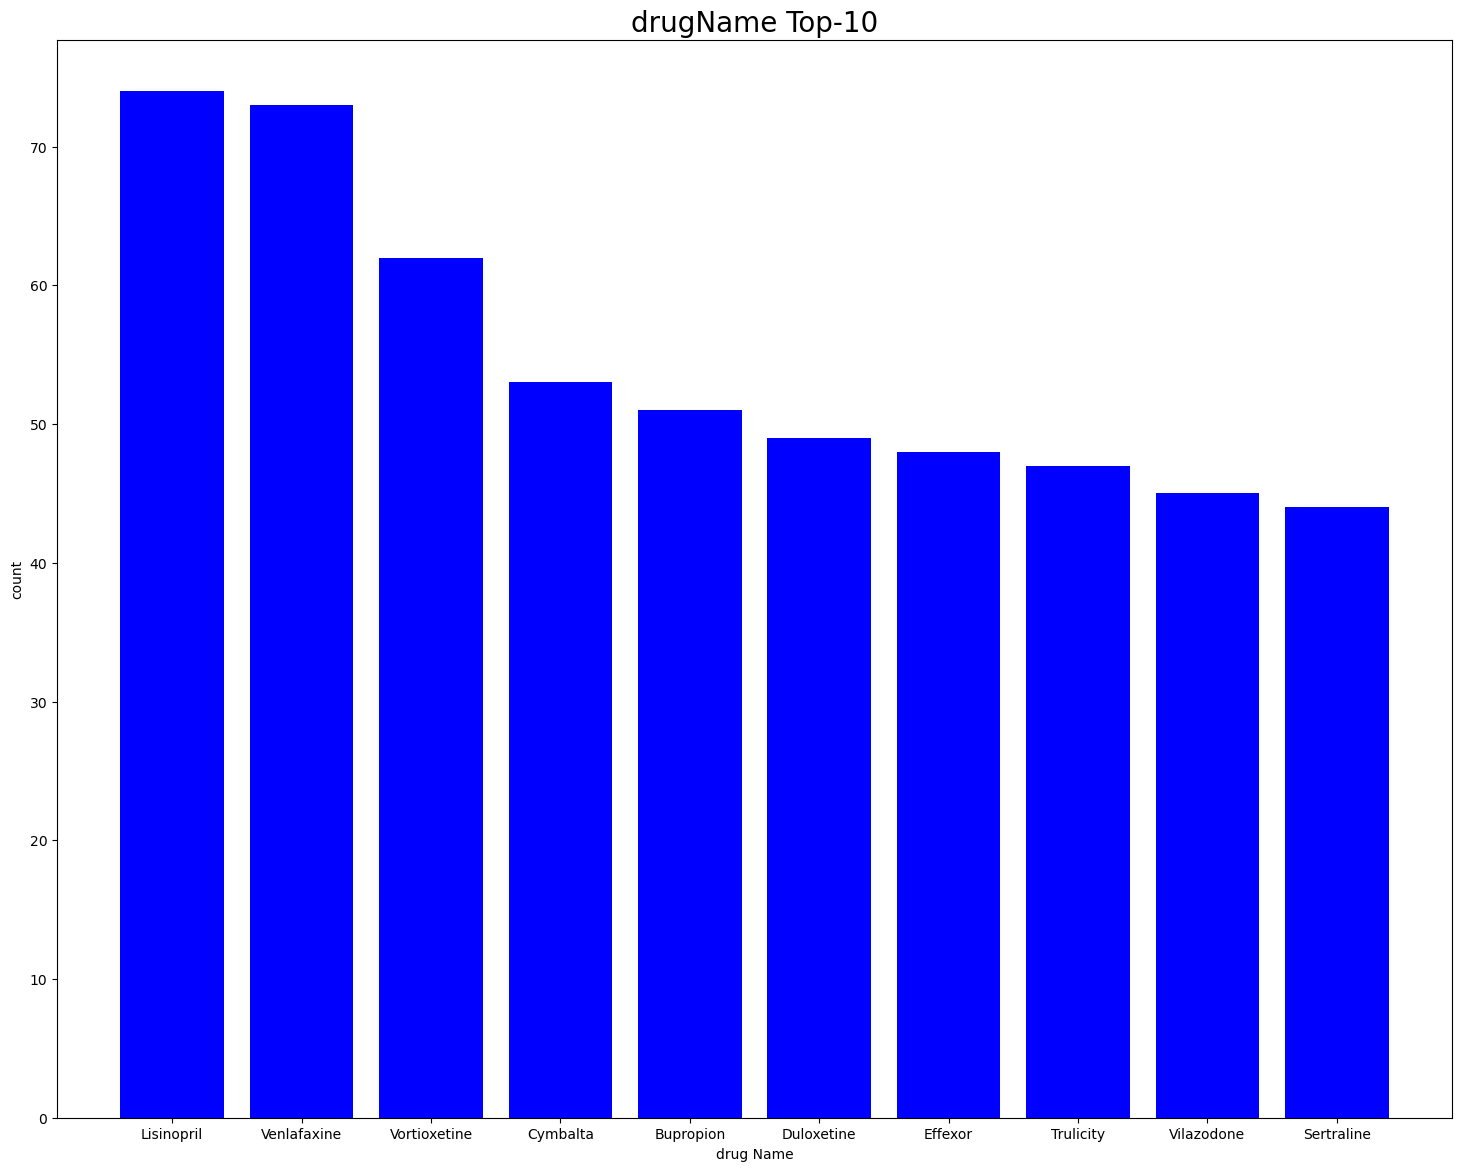

In [14]:
plt.figure(figsize=(18,14))
drugName_top = drug.loc[drug['rating'] == 1, :]['drugName'].value_counts().head(10)

plt.bar(drugName_top.index,drugName_top.values,color='blue')
plt.title('drugName Top-10',fontsize = 20)
plt.xlabel('drug Name')
plt.ylabel('count')
plt.show()

these are the top 10 drugs which are highest rated and most assigned for the patients of depression,high BP and diabetes type2 

Lisinopril is the most preferred drung 

In [15]:
drug.loc[drug['rating'] == 1, :]['drugName'].value_counts().tail(10)

Nifedipine                           1
Hydrochlorothiazide / valsartan      1
Nitroglycerin                        1
Basaglar                             1
Hydrochlorothiazide / telmisartan    1
Tribenzor                            1
Empagliflozin / linagliptin          1
Zestril                              1
Micardis                             1
Midamor                              1
Name: drugName, dtype: int64

these are the bottom 10 drugs which are least rated and least assigned for the patients of depression,high BP and diabetes type2

In [16]:
drug['drugName'].nunique()

334

there are 334 unique drugs available to treat the patients who are having the above mentioned conditions

In [17]:
drug.groupby('condition')['drugName'].nunique().sort_values(ascending=False)

condition
High Blood Pressure    140
Depression             105
Diabetes, Type 2        89
Name: drugName, dtype: int64

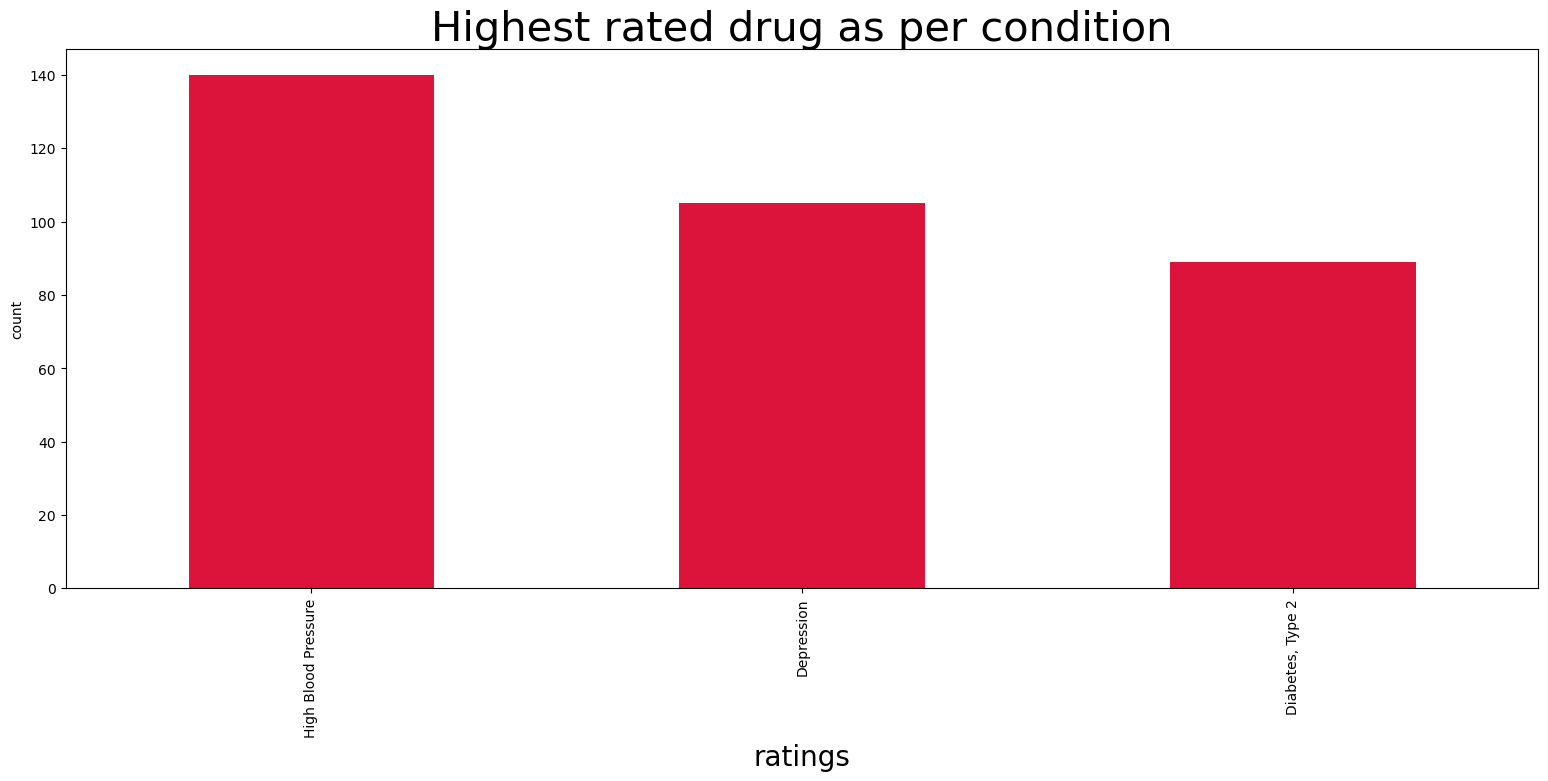

In [18]:
drug.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'crimson')
plt.title('Highest rated drug as per condition', fontsize = 30)
plt.xlabel('ratings', fontsize = 20)
plt.ylabel('count')
plt.show()

there are 140 different types of drugs which are given to the patient having High BP. 105 diiferent type of drugs which are given to the patients having Depression. 89 different types of drugs which are given to the patients having Diabetes.

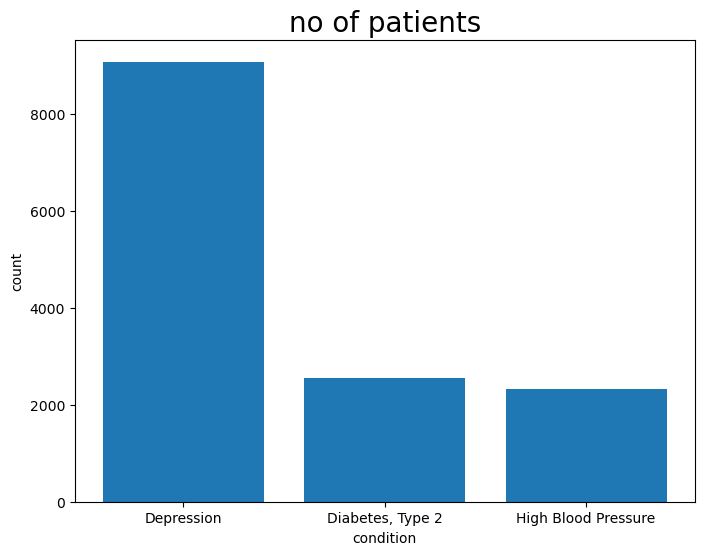

In [19]:
plt.figure(figsize=(8,6))
count = drug['condition'].value_counts(ascending = False)

plt.bar(count.index,count.values)
plt.title('no of patients',fontsize = 20)
plt.xlabel('condition')
plt.ylabel('count')
plt.show()

In [20]:
drug['condition'].value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

there are 9069 depression, 2554 diabetes type 2 and 2321 high BP patients are there 

In [21]:
drug['rating'].value_counts(ascending= False)

10.0    3763
9.0     2468
1.0     1802
8.0     1795
7.0      995
5.0      756
6.0      680
2.0      645
3.0      582
4.0      458
Name: rating, dtype: int64

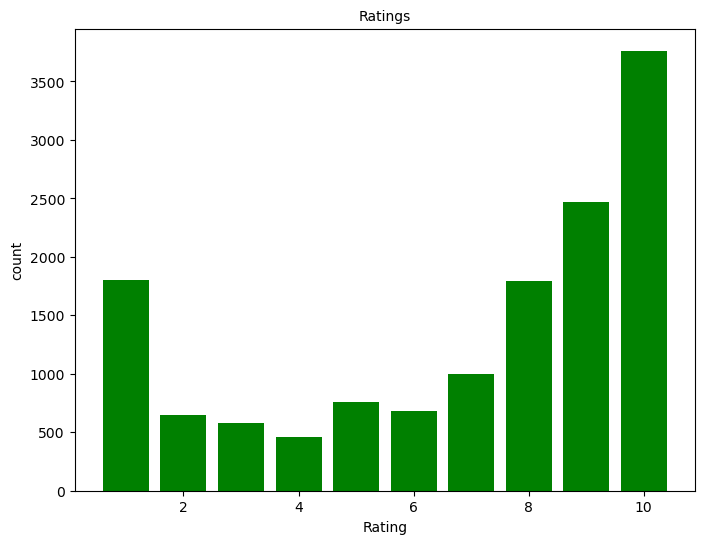

In [22]:
plt.figure(figsize=(8,6))
rating = drug['rating'].value_counts(ascending= False)

plt.bar(rating.index,rating.values,color='green')
plt.title('Ratings',fontsize = 10)
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

3763 patients gave 10 ratings and 458 patients gave 4 ratings 

In [23]:
drug.loc[drug['usefulCount'] == 1, :]['drugName'].value_counts().head(10)

Venlafaxine     14
Bupropion        8
Escitalopram     7
Fluoxetine       6
Paroxetine       4
Duloxetine       4
Dulaglutide      4
Trulicity        3
Sertraline       3
Citalopram       3
Name: drugName, dtype: int64

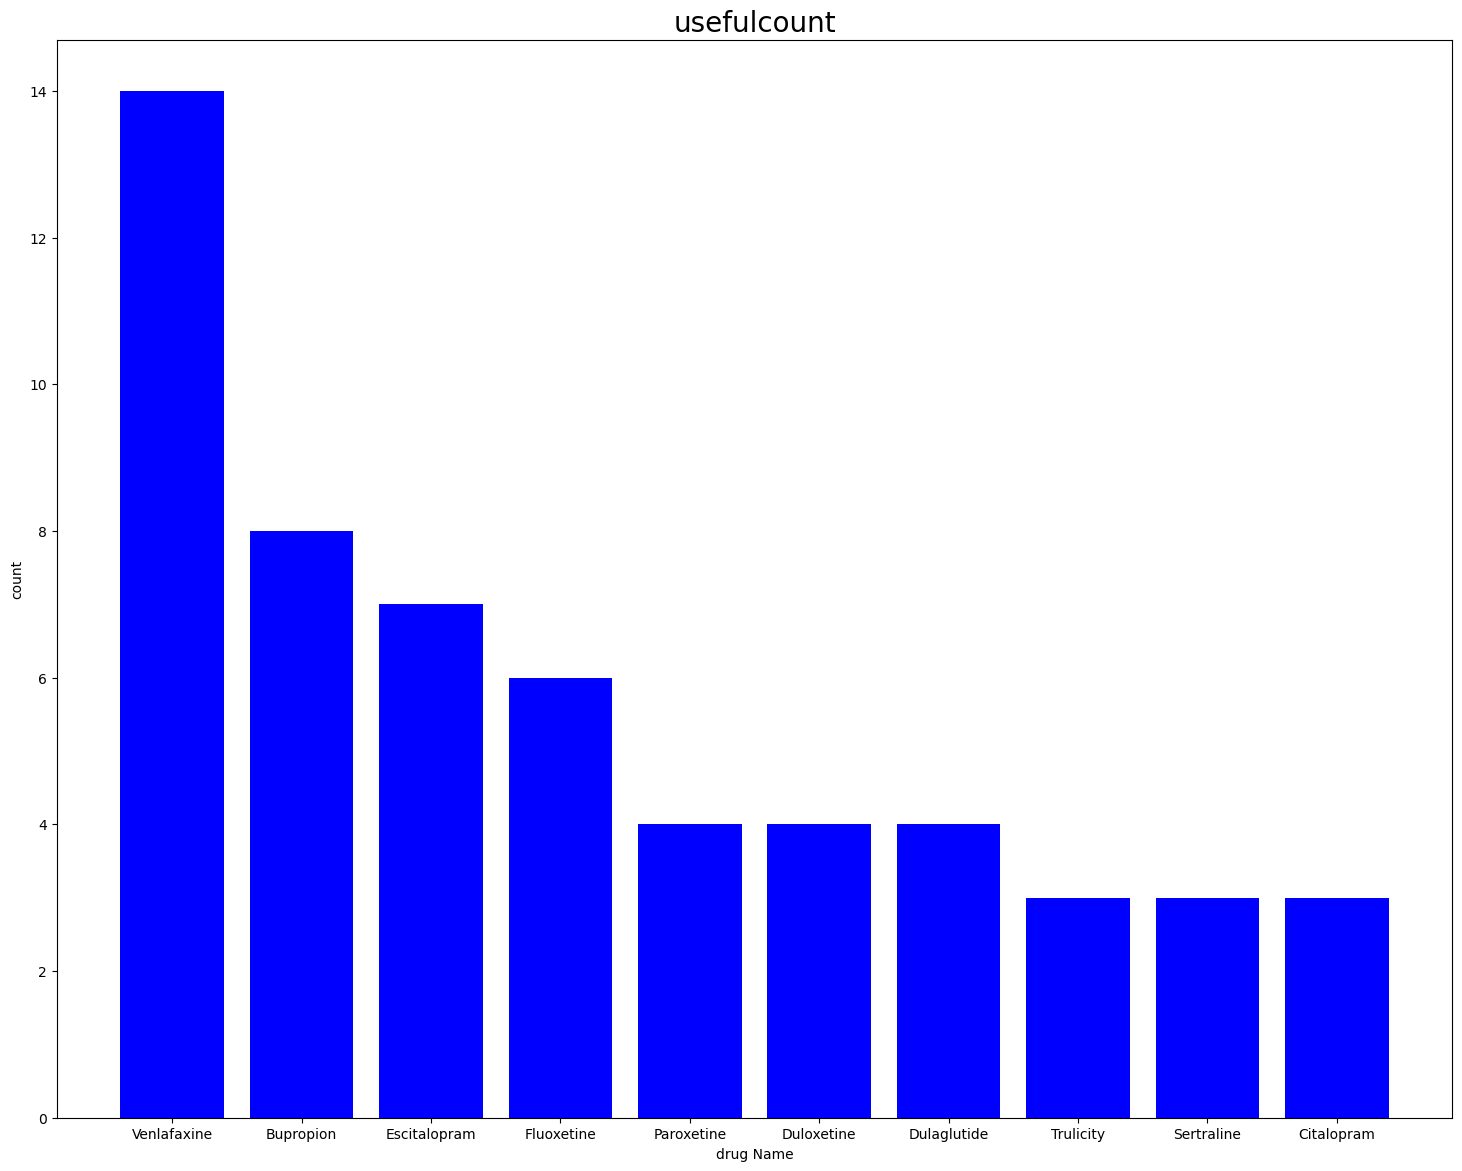

In [24]:
plt.figure(figsize=(18,14))
drugName_top1 = drug.loc[drug['usefulCount'] == 1, :]['drugName'].value_counts().head(10)

plt.bar(drugName_top1.index,drugName_top1.values,color='blue')
plt.title('usefulcount',fontsize = 20)
plt.xlabel('drug Name')
plt.ylabel('count')
plt.show()

With respect to the useful count details, the drug venlafaxine is found useful to the most no of patients,among all the drugs it has 14 time more no of useful counts.

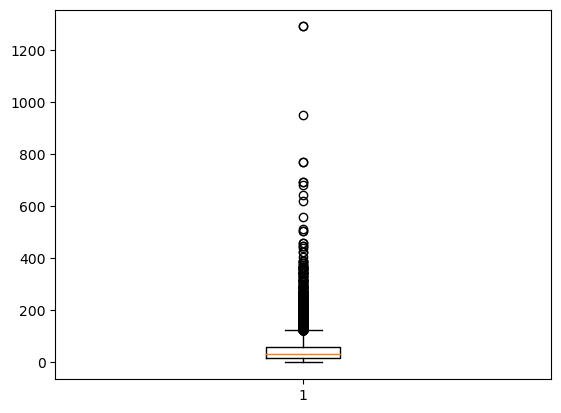

In [25]:
plt.boxplot(drug.usefulCount)
plt.show()

As there are more number of outliers present in the usefulcounts,we can understand that there are lot of useful drugs are present.

In [26]:
dep=drug[(drug['condition']=='Depression')]
bp=drug[(drug['condition']=='High Blood Pressure')]
dia=drug[(drug['condition']=='Diabetes, Type 2')]

In [27]:
!pip install wordcloud

In [28]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Word cloud for Depression')

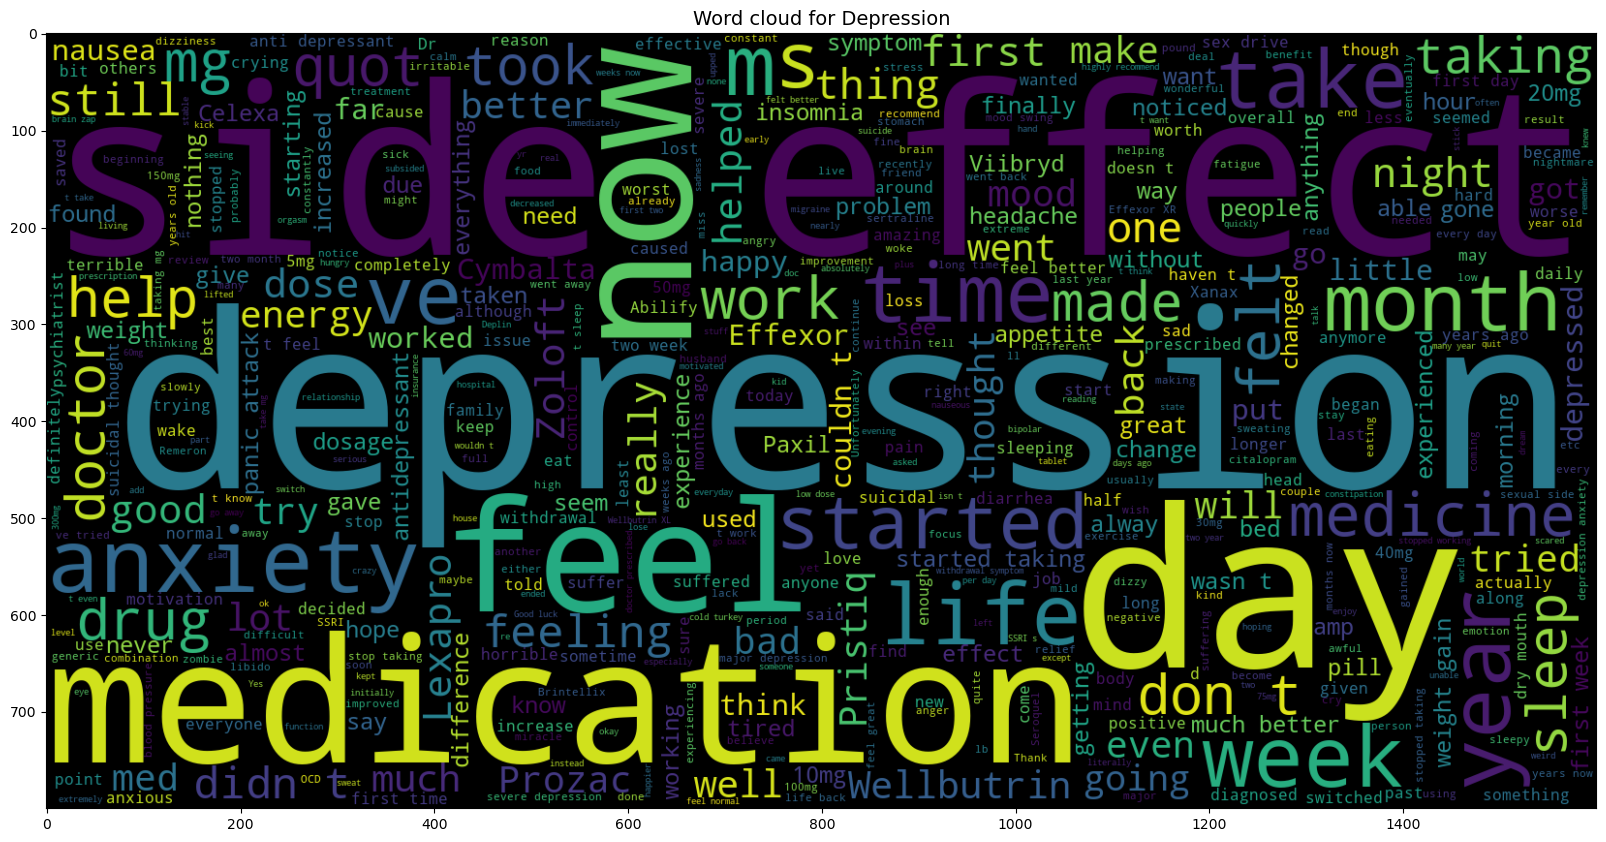

In [29]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

The large words which we can find in wordcloud are the most repeated words in all the reviews given by the patients having depression.

Text(0.5, 1.0, 'Word cloud for high blood pressure')

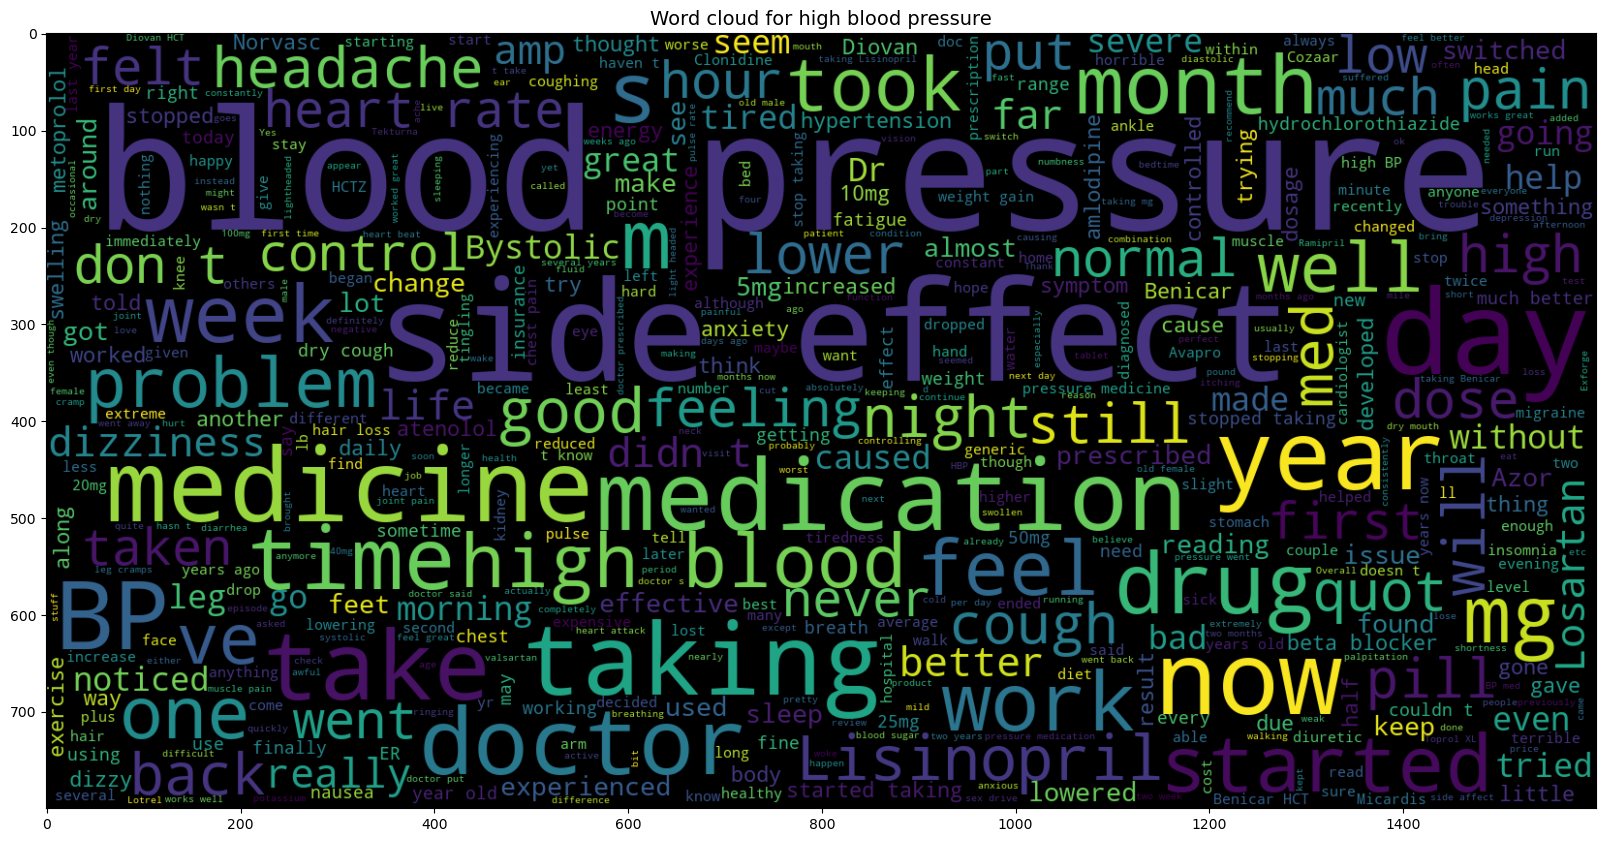

In [30]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for high blood pressure',fontsize=14)

The large words which we can find in wordcloud are the most repeated words in all the reviews given by the patients having High blood pressure.

Text(0.5, 1.0, 'Word cloud for Diabetes type 2')

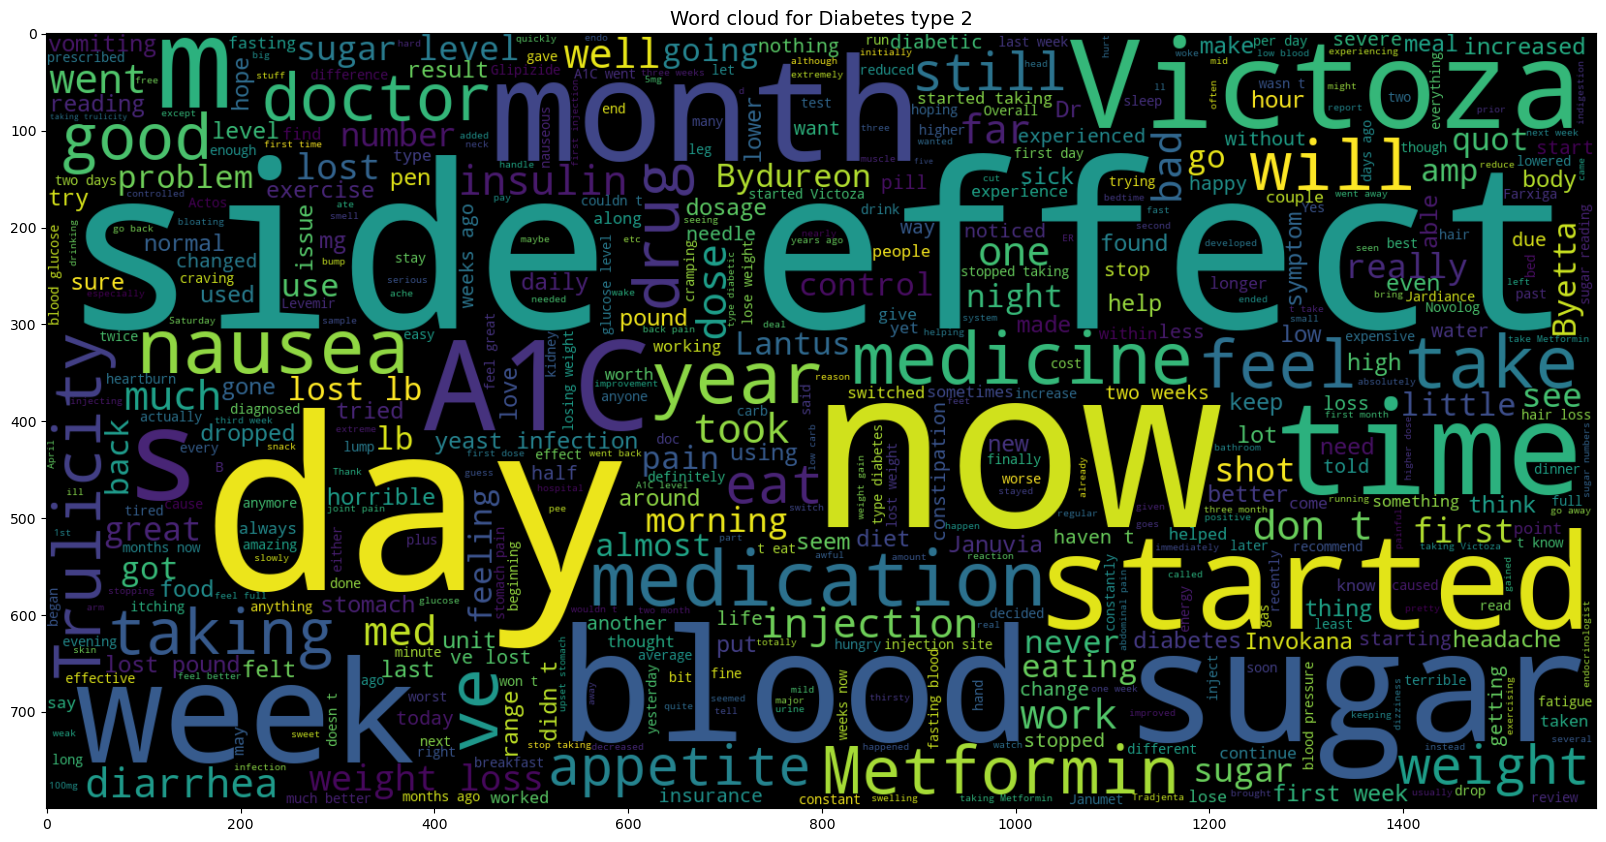

In [31]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(dia.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes type 2',fontsize=14)

The large words which we can find in wordcloud are the most repeated words in all the reviews given by the patients having diabetes type 2.

#### Sentiment Analysis

In [32]:
# let's make a new column review sentiment 

drug.loc[(drug['rating'] >= 5), 'Review_Sentiment'] = 1
drug.loc[(drug['rating'] < 5), 'Review_Sentiment'] = 0

drug['Review_Sentiment'].value_counts()

1.0    10457
0.0     3487
Name: Review_Sentiment, dtype: int64

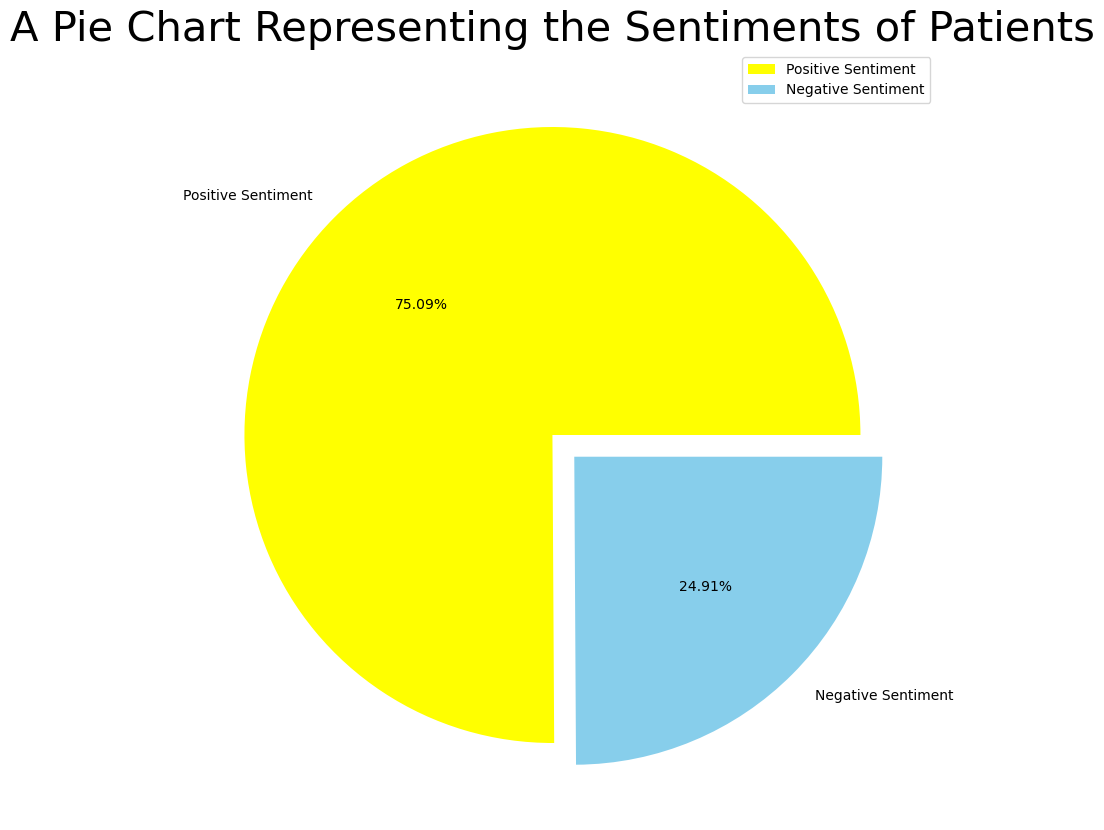

In [33]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['yellow', 'skyblue']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

### Data Preprocessing 

In [34]:
x=drug.drop(['Unnamed: 0','drugName','rating','date','usefulCount','Review_Sentiment'], axis=1)

In [35]:
x

condition                                             review
11               Depression  "I have taken anti-depressants for years, with...
31               Depression  "1 week on Zoloft for anxiety and mood swings....
44               Depression  "my gp started me on Venlafaxine yesterday to ...
50         Diabetes, Type 2  "Hey Guys,  It&#039;s been 4 months since my l...
67               Depression  "This medicine saved my life. I was at my wits...
...                     ...                                                ...
161251  High Blood Pressure  "It is fourth blood pressure pill for me. It f...
161258  High Blood Pressure  "While on Bystolic my feet and arms were numb....
161278     Diabetes, Type 2  "I just got diagnosed with type 2. My doctor p...
161286           Depression  "This is the third med I&#039;ve tried for anx...
161290  High Blood Pressure  "I have only been on Tekturna for 9 days. The ...

[13944 rows x 2 columns]

In [36]:
x.condition.value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [37]:
x['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [38]:
x['review'][44]

'"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"'

In [39]:
for i, col in enumerate(x.columns):
    x.iloc[:, i] = x.iloc[:, i].str.replace('"', '')

In [40]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

In [41]:
x.head()

condition  \
11  Depression         
31  Depression         
44  Depression         
50  Diabetes, Type 2   
67  Depression         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           review  
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                                                                                             
31  1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
44  my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better                                                          
50  Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol.  I have been back on the Metformin with Trulicity for about a week now, so we will see what this does.  I was diagnosed as  stage 3 chronic kidney disease (CKD 3) so I am watching diet closely.  
67  Th

### Removing stop words

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [44]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
from bs4 import BeautifulSoup
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
nltk.download('omw-')

[nltk_data] Error loading omw-: Package 'omw-' not found in index


False

In [47]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [48]:
x['review_clean'] = x['review'].apply(review_to_words)

In [49]:
x.head()

condition  \
11  Depression         
31  Depression         
44  Depression         
50  Diabetes, Type 2   
67  Depression         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           review  \
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                                                                                              
31  1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
44  my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better                                                           
50  Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol.  I have been back on the Metformin with Trulicity for about a week now, so we will see what this does.  I was diagnosed as  stage 3 chronic kidney disease (CKD 3) so I am watching diet closely.   
6

### Splitting the data

In [50]:
X_feat=x['review_clean']
y=x['condition']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

### Feature extraction

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools #confusion matrix

In [54]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

accuracy:   0.955
Confusion matrix, without normalization


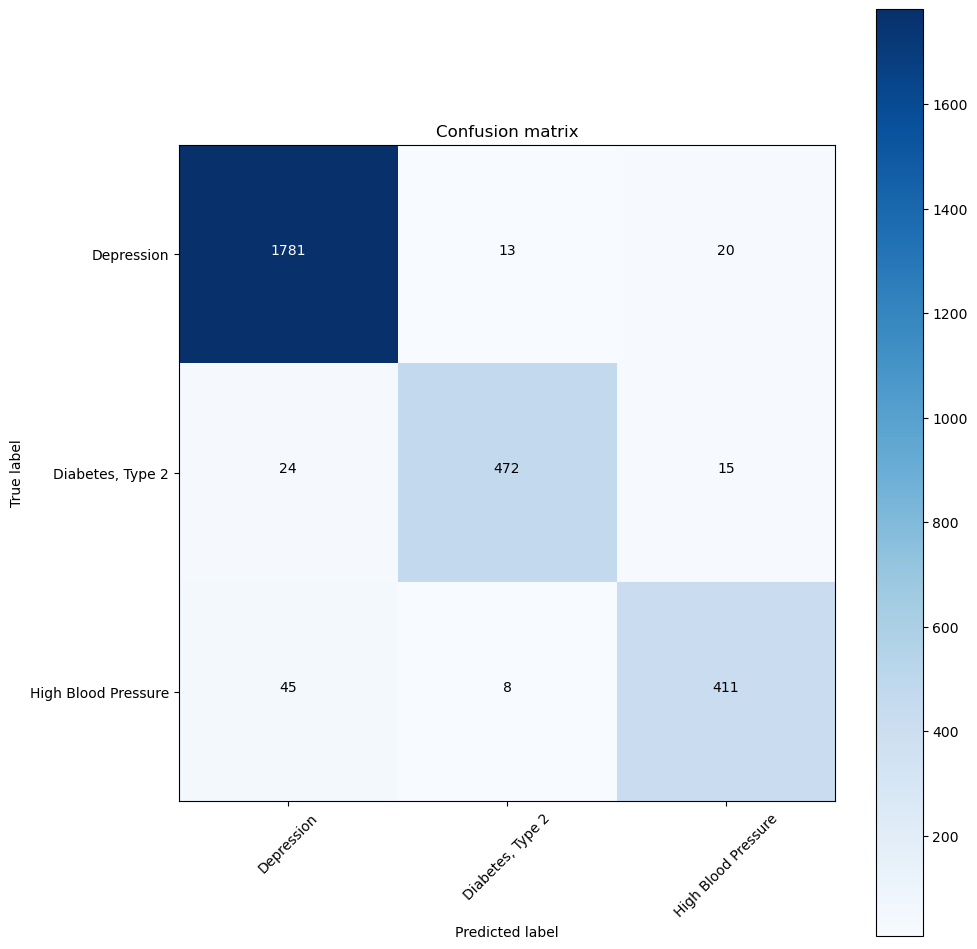

In [55]:
#NaiveBayes
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score1 = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score1)

cm = metrics.confusion_matrix(y_test, pred, labels=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.952
Confusion matrix, without normalization


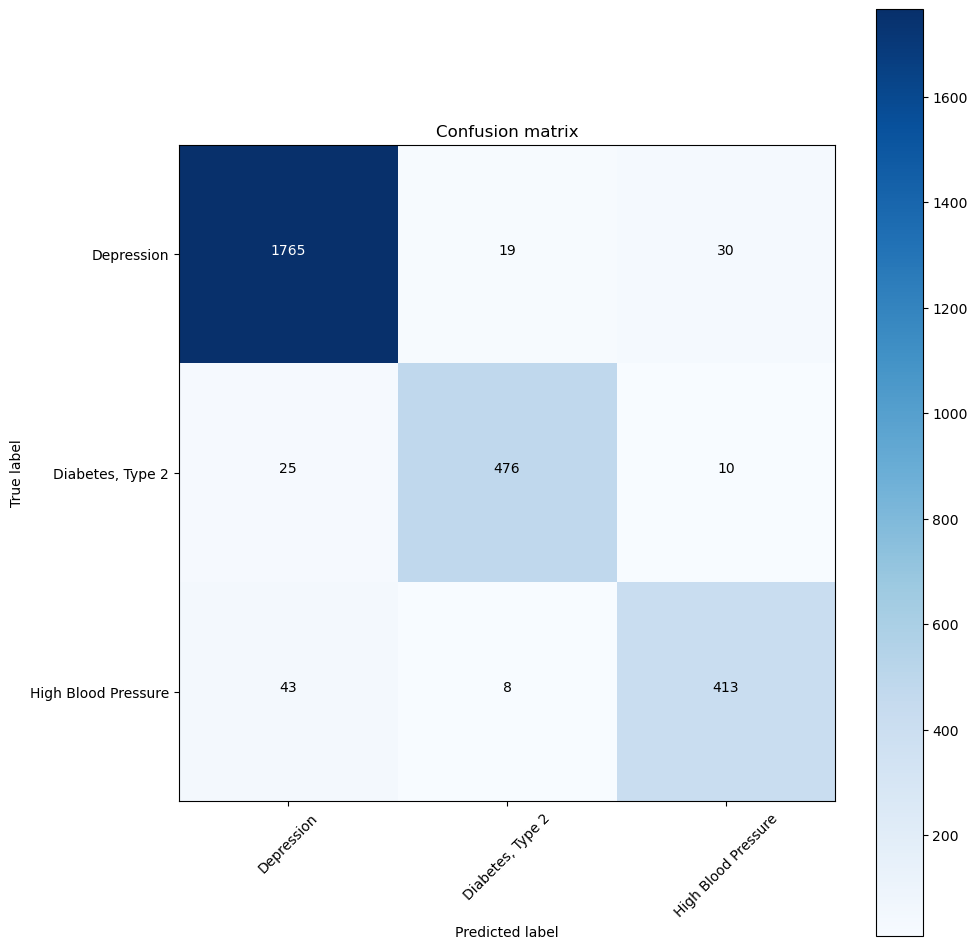

In [56]:
#PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score2 = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score2)
cm = metrics.confusion_matrix(y_test, pred, labels=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
     

### Applying TFIDF vectorizer

In [57]:
#TFIDF Vectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
     

accuracy:   0.896
Confusion matrix, without normalization


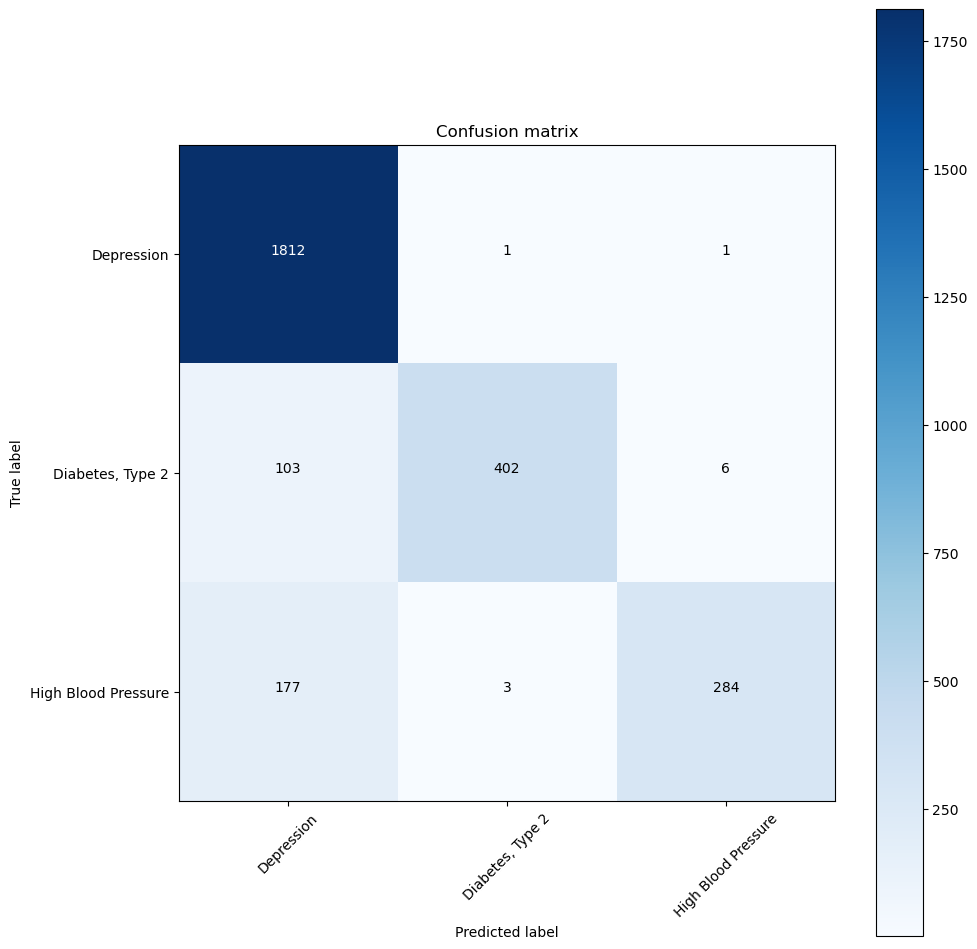

In [58]:
#NaiveBayes after TFIDF
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train, y_train)
pred = mnb_tf.predict(tfidf_test)
score3 = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score3)
cm = metrics.confusion_matrix(y_test, pred, labels=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
     

accuracy:   0.961
Confusion matrix, without normalization


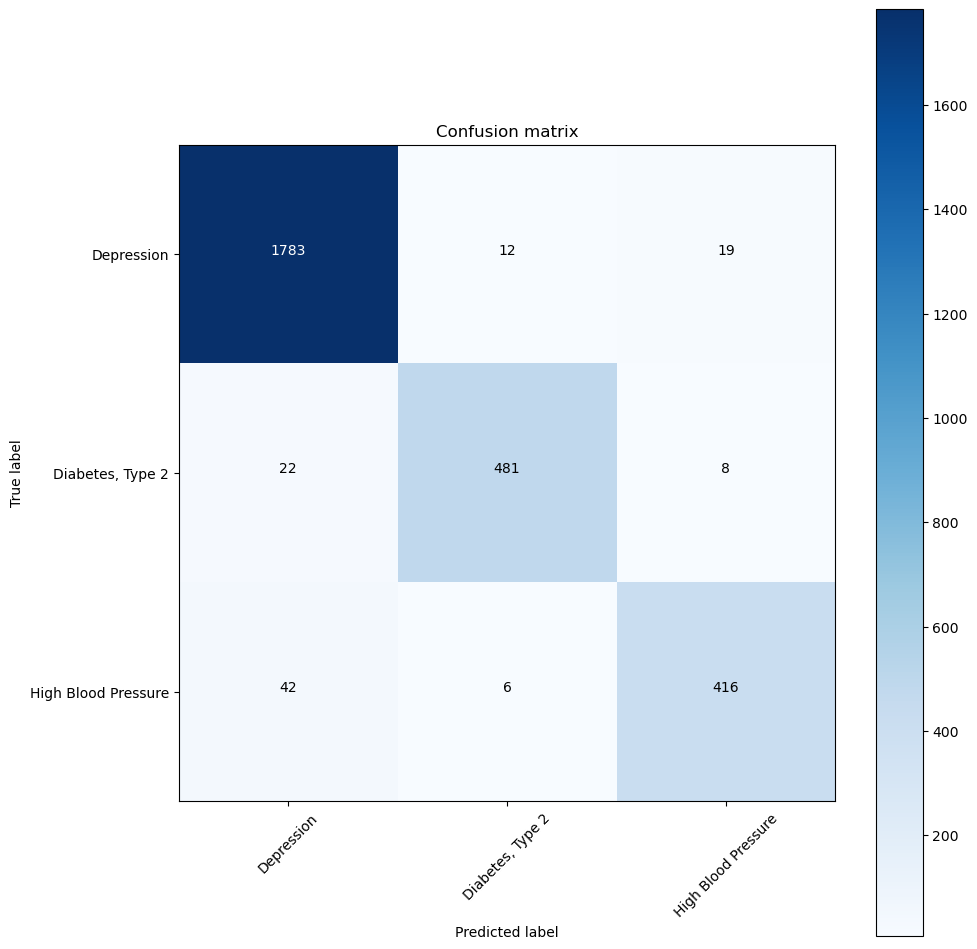

In [59]:
#PassiveAggressiveClassifier after TFIDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf1 = PassiveAggressiveClassifier()
pass_tf1.fit(tfidf_train, y_train)
pred = pass_tf1.predict(tfidf_test)
score4 = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score4)
cm = metrics.confusion_matrix(y_test, pred, labels=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])

### let's try with bigrams and trigrams

In [60]:
# Bigrams
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.966
Confusion matrix, without normalization


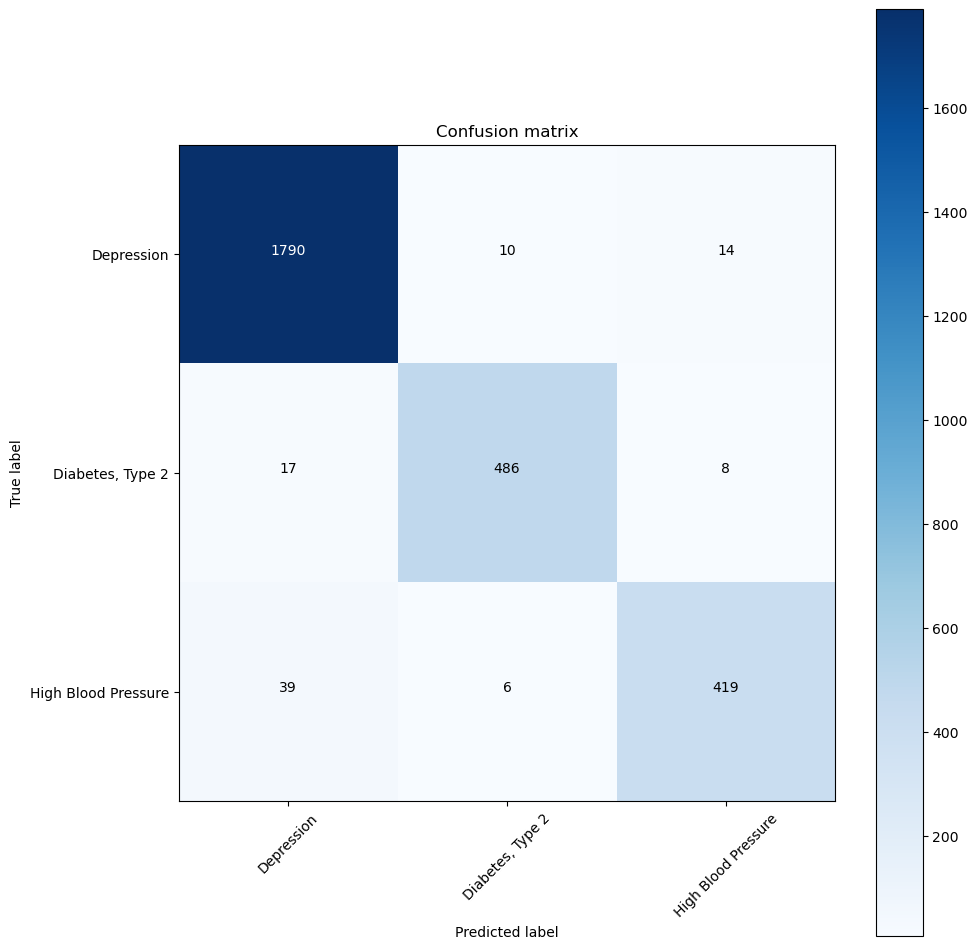

In [61]:
pass_tf2 = PassiveAggressiveClassifier()
pass_tf2.fit(tfidf_train_2, y_train)
pred = pass_tf2.predict(tfidf_test_2)
score5 = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score5)
cm = metrics.confusion_matrix(y_test, pred, labels=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.965
Confusion matrix, without normalization


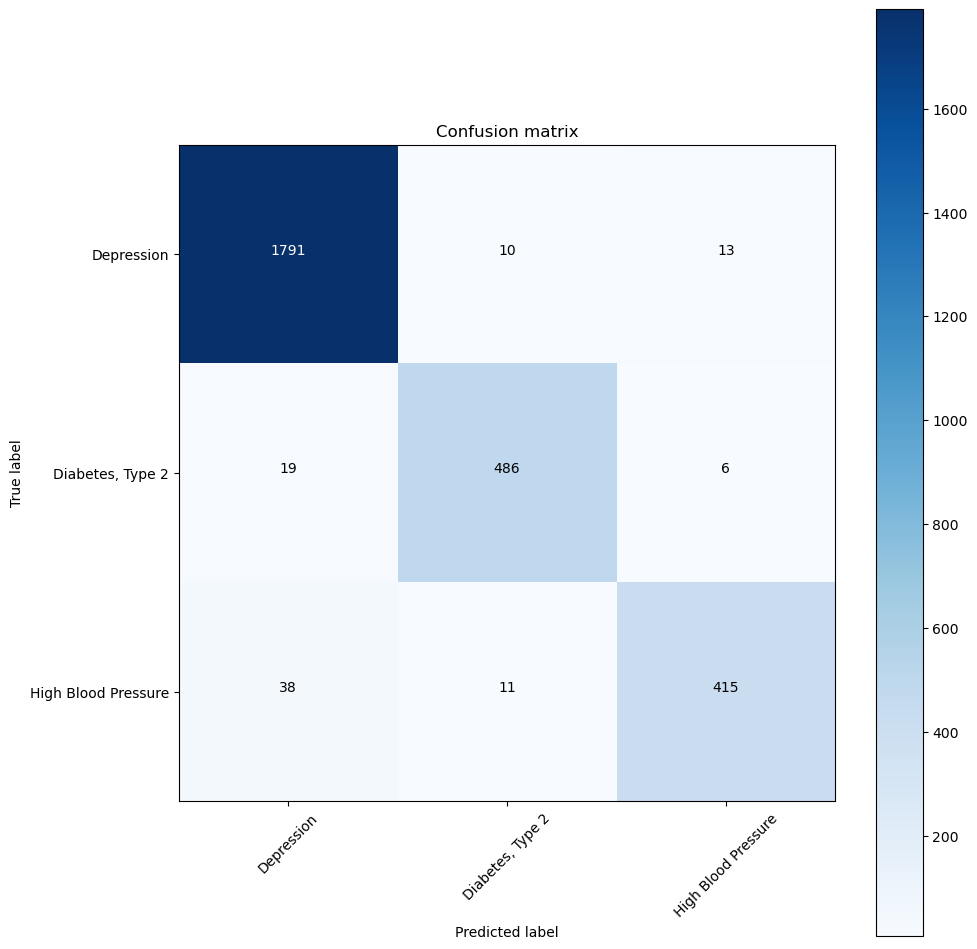

In [62]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf3 = PassiveAggressiveClassifier()
pass_tf3.fit(tfidf_train_3, y_train)
pred = pass_tf3.predict(tfidf_test_3)
score6 = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score6)
cm = metrics.confusion_matrix(y_test, pred, labels=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=[ 'Depression','Diabetes, Type 2','High Blood Pressure'])
     

### Summarizing

In [63]:
data1={'Models':['Naive Bayes with count_vectorizer','PassiveAggressiveClassifier with count_vectorizer',
                'Naive Bayes with TIDF_vectorizer','PassiveAggressiveClassifier with TIDF_vectorizer',
                'Bigram','Trigram'],
      'Score': [score1,score2,score3,score4,score5,score6]}
Model= pd.DataFrame(data1)
Model= Model.sort_values('Score').reset_index(drop=True)
Model

Models     Score
0  Naive Bayes with TIDF_vectorizer                   0.895662
1  PassiveAggressiveClassifier with count_vectorizer  0.951596
2  Naive Bayes with count_vectorizer                  0.955181
3  PassiveAggressiveClassifier with TIDF_vectorizer   0.960918
4  Trigram                                            0.965221
5  Bigram                                             0.966296

In [64]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(count_vectorizer, mnb, 'Depression')

Depression month -4.573272894033828
Depression anxiety -4.520501192138147
Depression taking -4.476505342098832
Depression week -4.375620848315087
Depression year -4.3442287817545715
Depression feel -4.338292368561154
Depression effect -4.263902587190406
Depression day -4.172691945971481
Depression depression -4.068024290300039
Depression mg -3.9902509790633474


In [65]:
most_informative_feature_for_class(count_vectorizer, mnb, 'High Blood Pressure')

High Blood Pressure medication -4.8221615178171024
High Blood Pressure medicine -4.744837434382559
High Blood Pressure doctor -4.669692924172828
High Blood Pressure year -4.403709214182126
High Blood Pressure day -4.348488159682404
High Blood Pressure taking -4.341188857200793
High Blood Pressure mg -4.236555878861344
High Blood Pressure effect -4.119258162311792
High Blood Pressure blood -3.7669617220843064
High Blood Pressure pressure -3.743351856445172


In [66]:
most_informative_feature_for_class(count_vectorizer, mnb, 'Diabetes, Type 2')

Diabetes, Type 2 lost -4.763992476512609
Diabetes, Type 2 weight -4.708464334602658
Diabetes, Type 2 started -4.686802837821479
Diabetes, Type 2 taking -4.685375285830293
Diabetes, Type 2 effect -4.568385083007004
Diabetes, Type 2 blood -4.478627902201191
Diabetes, Type 2 month -4.477468481781456
Diabetes, Type 2 week -4.23028255891303
Diabetes, Type 2 day -4.169711172476841
Diabetes, Type 2 sugar -4.147806337088792


In [67]:
x.tail()

condition  \
161251  High Blood Pressure   
161258  High Blood Pressure   
161278  Diabetes, Type 2      
161286  Depression            
161290  High Blood Pressure   

                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
161251  It is fourth blood pressure pill for me. It feels like it is only partly working. My blood pressure problems are usually happening after anxiety attacks of which doctors says I have but don&#039;t know why.                                                                                                                                                                                                                                   
161258  While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112.                                                            
161278  I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me                                                                                                                                                                                                                    
161286  This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.                                                                                                                                                                                                          
161290  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.   

                                                                                                                                                                                                                                                                       review_clean  
161251  fourth blood pressure pill feel like partly working blood pressure problem usually happening anxiety attack doctor say know                                                                                                                                                  
161258  bystolic foot arm numb blood sugar became severely elevated glucose blood pressure pill good choice diabetic condition bystolic one week eight week later still suffering foot heel pain however going back vasotec blood sugar dropped back                                 
161278  got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine                                                                                                                          
161286  third med tried anxiety mild depression week hate much diz

In [68]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = drug[(drug['rating']>=9)&(drug['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [69]:
def predict_text(lst_text):
    df_test=pd.DataFrame(lst_text,columns=['text_sent'])
    df_test['text_sent']=df_test['text_sent'].apply(review_to_words)
    cv=count_vectorizer.transform(lst_text)
    prediction=mnb.predict(cv)
    df_test['prediction']=prediction
    return df_test

In [70]:
sentences=['It is fourth blood pressure pill for me. It feels like it is only partly working. My blood pressure problems are usually happening after anxiety attacks of which doctors says I have but don&#039;t know why.',
          'While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112.',
          'I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me',
          'This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.']

In [71]:
sentences

['It is fourth blood pressure pill for me. It feels like it is only partly working. My blood pressure problems are usually happening after anxiety attacks of which doctors says I have but don&#039;t know why.',
 'While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112.',
 'I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me',
 'This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. 

In [72]:
cv=count_vectorizer.transform(sentences)
predictions=mnb.predict(cv)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target='Diabetes,Type 2'
        print('text:',text,'\nCondition:',target)
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        
    
        

text: It is fourth blood pressure pill for me. It feels like it is only partly working. My blood pressure problems are usually happening after anxiety attacks of which doctors says I have but don&#039;t know why. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me 

In [73]:
df_testsent = predict_text(sentences)
df_testsent

text_sent  \
0  fourth blood pressure pill feel like partly working blood pressure problem usually happening anxiety attack doctor say know                                                                                                                    
1  bystolic foot arm numb blood sugar became severely elevated glucose blood pressure pill good choice diabetic condition bystolic one week eight week later still suffering foot heel pain however going back vasotec blood sugar dropped back   
2  got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine                                                                                            
3  third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap                                                                                                                    

            prediction  
0  High Blood Pressure  
1  High Blood Pressure  
2  Diabetes, Type 2     
3  Depression

In [74]:
import pickle

In [75]:
filename='drug.pkl'

In [76]:
pickle.dump(mnb,open(filename,'wb'))

In [77]:
pickle.dump(count_vectorizer,open('transform.pkl','wb'))